In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 21.5 MB/s eta 0:00:00


In [6]:
tokenizer_name = "monologg/koelectra-small-v2-distilled-korquad-384"
model_name = "monologg/koelectra-small-v2-distilled-korquad-384"

In [4]:
import json
import random

import torch
import numpy as np
from tqdm.notebook import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForQuestionAnswering, AdamW

In [7]:
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)

Downloading:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [8]:
with open("/content/drive/MyDrive/WARNING_PRIVATE_FOLDER/goorm_nlp_8th_group3/goorm_nlp_8th_group3/project2/train.json", 'rb') as f:
    input_dict = json.load(f)
from pprint import pprint
pprint(input_dict["data"][0])
print(input_dict['data'][0]['paragraphs'][0]['context'][478])

{'news_category': '종합',
 'paragraphs': [{'context': '올여름 장마가 17일 제주도에서 시작됐다. 서울 등 중부지방은 예년보다 사나흘 정도 늦은 '
                            '이달 말께 장마가 시작될 전망이다.17일 기상청에 따르면 제주도 남쪽 먼바다에 있는 '
                            '장마전선의 영향으로 이날 제주도 산간 및 내륙지역에 호우주의보가 내려지면서 곳곳에 '
                            '100㎜에 육박하는 많은 비가 내렸다. 제주의 장마는 평년보다 2~3일, 지난해보다는 '
                            '하루 일찍 시작됐다. 장마는 고온다습한 북태평양 기단과 한랭 습윤한 오호츠크해 기단이 '
                            '만나 형성되는 장마전선에서 내리는 비를 뜻한다.장마전선은 18일 제주도 먼 남쪽 해상으로 '
                            '내려갔다가 20일께 다시 북상해 전남 남해안까지 영향을 줄 것으로 보인다. 이에 따라 '
                            '20~21일 남부지방에도 예년보다 사흘 정도 장마가 일찍 찾아올 전망이다. 그러나 '
                            '장마전선을 밀어올리는 북태평양 고기압 세력이 약해 서울 등 중부지방은 평년보다 사나흘가량 '
                            '늦은 이달 말부터 장마가 시작될 것이라는 게 기상청의 설명이다. 장마전선은 이후 한 '
                            '달가량 한반도 중남부를 오르내리며 곳곳에 비를 뿌릴 전망이다. 최근 30년간 평균치에 '
                            '따르면 중부지방의 장마 시작일은 6월24~25일이었으며 장마기간은 32일, 강수일수는 '
                            

In [ ]:

# print(input_dict['data'][0]['paragraphs'][0]['context'][478])

# print(len(remove_pre(input_dict['data'][0]['paragraphs'][0]['context'][:479])))
# input_dict['data'][0]['paragraphs'][0]['context'] = remove_pre(input_dict['data'][0]['paragraphs'][0]['context'])
# print(input_dict['data'][0]['paragraphs'][0]['context'][471])


In [9]:
from pprint import pprint
pprint(input_dict["data"][1])

{'news_category': '경제',
 'paragraphs': [{'context': '부산시와 (재)부산정보산업진흥원(원장 이인숙)이 ‘2020~2021년 지역SW서비스사업화 '
                            '지원사업’ 공모사업에 4개 과제가 선정되어 본격적인 사업 착수에 나선다. '
                            '과학기술정보통신부가 주관하는 ‘지역SW서비스사업화 지원사업’은 강소SW기업 및 초기 '
                            '스타트업의 SW서비스 사업화 지원과 신시장 진출 지원을 통해 기업 경쟁력 강화와 지역경제 '
                            '활성화를 도모하는 사업이다. 올해부터 2개년으로 진행되며, 국비와 시비, 민자 등 2년간 '
                            '약 37억원의 예산이 투입된다. 앞서 진흥원은 부산의 미래 먹거리산업인 스마트해양, '
                            '지능형기계, 지능정보서비스 분야로 사전 수요조사를 진행했고, 평가를 통해 선정된 5개 '
                            '과제를 공모사업에 신청했다. 그 결과 부산의 4개 과제가 최종 선정되는 쾌거를 거뒀다. '
                            '당 사업은 전국 진흥기관을 대상으로 공모를 시작해, 총 17개 지역에서 42개 과제가 '
                            '선정되었으며, 4개 과제가 선정된 곳은 부산과 강원지역 뿐이다. 금번 선정된 과제들은 '
                            '‘인공지능융합센서와 서보 이송 로봇을 이용한 전단보강재의 자동용접시스템 개발’ 등 총 '
                            '4개 과제다. 부산시가 지원하고, 부산정보산업진흥원과 지역기업, 대학, 연구소 등이 '
                            '컨소

In [ ]:
# print(input_dict['data'][1]['paragraphs'][0]['context'][1422])

# print(len(remove_pre(input_dict['data'][1]['paragraphs'][0]['context'][:1423])))
# input_dict['data'][1]['paragraphs'][0]['context'] = remove_pre(input_dict['data'][1]['paragraphs'][0]['context'])
# print(input_dict['data'][1]['paragraphs'][0]['context'][1366])

In [ ]:

# print(input_dict['data'][2]['paragraphs'][0]['context'][107])

# print(len(remove_pre(input_dict['data'][2]['paragraphs'][0]['context'][:108])))
# input_dict['data'][2]['paragraphs'][0]['context'] = remove_pre(input_dict['data'][2]['paragraphs'][0]['context'])
# print(input_dict['data'][2]['paragraphs'][0]['context'][106])

In [10]:
cnt = 0
k=1000
for data in input_dict['data']:
        for passage in data['paragraphs']:
            for qa in passage['qas']:              
                for answer in qa['answers']:   
                    print(answer['text'])
                    cnt += 1
                    if cnt==k:
                        break
                if cnt==k:
                    break
            if cnt==k:
                break
        if cnt==k:
            break

한 달가량
한 달
삼보테크놀로지
와쿠이 히데아키
‘교동반점 짬뽕’
교동반점 짬뽕
‘불닭볶음면’
불닭볶음면
환경오염이 심한 지역
웰니스 엠버서더
2020
서울대
4월 5일
김동재
11월 7일
104억엔
104억엔(약 1200억원)
약 1200억원
60인치 이상 대형 LCD TV
대형 LCD TV
LCD TV
TV
12명
12
월스트리트저널
중국 중앙은행
인민은행
'화염인간'
화염인간
발
2004년
2004
11년
LG생활건강 오휘
오휘
소수인종 학생
SKT 스마트 컨택센터
3월15일
15일
주식매수청구권
배달료
네오 누아르 액션 스릴러
6년
J트러스트그룹
일본
1727
1727년
최문기
KT
수원
울산
피터팬 신드롬
2007년
2007
‘환 위험’
환 위험
사업 허가 신청서
연 5.73%
정규적 3루수
3루수
‘일심(一心)’
일심(一心)
일심
一心
9년
9
문 아래
군의(軍毅)
군의
軍毅
호적
3만880원
‘아로나민 골드를 드셔 보신 날과 그렇지 않을 날을 비교해보세요’
아로나민 골드를 드셔 보신 날과 그렇지 않을 날을 비교해보세요
‘다음 분기 첫째달 10일’
다음 분기 첫째달 10일
이재용
메이저 릿지
체로키 족이 선택한 존 로스 수장
존 로스 수장
존 로스
〈성당과 시장〉(The Cathedral and the Bazaar)
〈성당과 시장〉
성당과 시장
The Cathedral and the Bazaar
키쿠유족
중국
프리미어마일즈 카드
프리미어마일즈
씨티은행
사리사
마케도니아 왕국
더글러스 맥아더 장군
맥아더 장군
실용로 단계
감사관
지방세분석과장
이영희 막달레나
이영희
지난해
15일
지상 20층
20층
20
말
전박찬
영국
체코
‘이음새 없는 금속 테두리’
이음새 없는 금속 테두리
맞춤형 줄기세포
12월 21일
21일
은평구
12억8000만달러
넷플릭스
존 폴슨
'인사관리에 대한 통제권'
인사관리에 대한 통제권
귀인 평향과 행동의 상관 관계
토마스 기로비치(Thomas Gilovich)
토마스 기로비치
Thomas Gilovich
<옥자>
옥자
‘플레인 

In [11]:
import re
def remove_pre(text):
        ''' 불필요한 기호 제거 '''
        text = text.strip()
        text = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", " ", text)
        text = re.sub("  ", " ", text)
        return text

In [12]:
def answer_position_tendency(input_dict):
    rate = []
    for data in input_dict['data']:
        for passage in data['paragraphs']:
            for qa in passage['qas']:              
                for answer in qa['answers']:   
                    rate.append(answer['answer_start']/len(passage['context']))
    return rate

In [13]:
import matplotlib.pyplot as plt
ratedd = answer_position_tendency(input_dict)



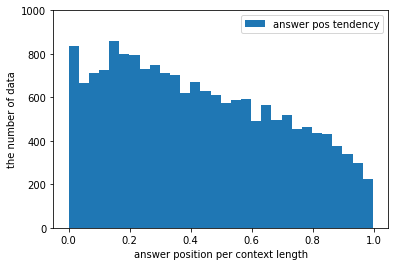

In [14]:

plt.hist(ratedd, bins=30, label='answer pos tendency')
plt.xlabel("answer position per context length")
plt.ylabel('the number of data')
plt.ylim([0, 1000]) 
plt.legend()
plt.show()

In [15]:
from copy import deepcopy
def split_input_dict(input_dict, ratio = 0.1, seed = 42):
    split_point = int(len(input_dict['data']) * ratio)
    random.seed(seed)
    random.shuffle(input_dict['data'])
    valid_dict = deepcopy(input_dict)
    train_dict = input_dict

    valid_dict['data'] = input_dict['data'][:split_point]
    #train_dict['data'] = input_dict['data'][split_point:] #warning!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

    return train_dict, valid_dict

In [16]:
import re
def read_input(path):
    with open(path, 'rb') as f:
        input_dict = json.load(f)
    train_dict,valid_dict =split_input_dict(input_dict)
    train_contexts = []
    train_questions = []
    train_answers = []
    for group in tqdm(train_dict['data']):       #딕셔너리 하나씩 꺼낸다.
        for passage in group['paragraphs']:     #딕셔너리의 paragraphs
            context = passage['context']        #paragraphs의 context

            for qa in passage['qas']:           #paragraphs의 qas
                question = qa['question']       #paragraphs의 question
                for answer in qa['answers']:    #question의 answers
                # ## preprocess ##
                #     pprint(answer)
                #     answer['answer_start'] = len(remove_pre(context[:answer['answer_start']+1]))-1
                #     context = remove_pre(context)
                #     assert context[answer['answer_start']] == answer['text'][0]
                #     print("ha")
                # ## preprocess ##
                    ### context 넘겨서 자르기 ###
                    target_context = context
                    # if answer['answer_start'] > 1400:
                    #     target_context = target_context[1200:]
                    #     answer['answer_start'] -= 1200 
                    # elif answer['answer_start'] > 1200:
                    #     target_context = target_context[1000:]
                    #     answer['answer_start'] -= 1000
                    # elif answer['answer_start'] > 1000:
                    #     target_context = target_context[800:]
                    #     answer['answer_start'] -= 800
                    # elif answer['answer_start'] > 800:
                    #     target_context = target_context[600:]
                    #     answer['answer_start'] -= 600
                    ### context 넘겨서 자르기 ###
                
                    train_contexts.append(target_context)    #answers의 한 answer당 해당하는 context 저장
                    train_questions.append(question)  #answers의 한 answer당 해당하는 question 저장
                    train_answers.append(answer)      #answers의 한 answer 저장
  
    valid_contexts = []
    valid_questions = []
    valid_answers = []
    for group in tqdm(valid_dict['data']):       #딕셔너리 하나씩 꺼낸다.
        for passage in group['paragraphs']:     #딕셔너리의 paragraphs
            context = passage['context']        #paragraphs의 context

            for qa in passage['qas']:           #paragraphs의 qas
                question = qa['question']       #paragraphs의 question
                for answer in qa['answers']:    #question의 answers

                # ## preprocess ##    
                #     answer['answer_start'] = len(remove_pre(context[:answer['answer_start']+1]))-1
                #     context = remove_pre(context)
                #     assert context[answer['answer_start']] == answer['text'][0]
                # ## preprocess ##

                    ### context 넘겨서 자르기 ###
                    target_context = context
                    # if answer['answer_start'] > 1400:
                    #     target_context = target_context[1200:]
                    #     answer['answer_start'] -= 1200 
                    # elif answer['answer_start'] > 1200:
                    #     target_context = target_context[1000:]
                    #     answer['answer_start'] -= 1000
                    # elif answer['answer_start'] > 1000:
                    #     target_context = target_context[800:]
                    #     answer['answer_start'] -= 800
                    # elif answer['answer_start'] > 800:
                    #     target_context = target_context[600:]
                    #     answer['answer_start'] -= 600
                    ### context 넘겨서 자르기 ###

                    valid_contexts.append(target_context)    #answers의 한 answer당 해당하는 context 저장
                    valid_questions.append(question)  #answers의 한 answer당 해당하는 question 저장
                    valid_answers.append(answer)      #answers의 한 answer 저장
    return train_contexts, train_questions, train_answers, valid_contexts, valid_questions, valid_answers

In [17]:
def add_end_idx(answers, contexts):
    for answer, context in zip(answers, contexts):
        gold_text = answer['text']
        start_idx = answer['answer_start']
        end_idx = start_idx + len(gold_text)

        if context[start_idx:end_idx] == gold_text:
            answer['answer_end'] = end_idx
        elif context[start_idx-1:end_idx-1] == gold_text:
            print("there is an unitended error1 in dataset") #이렇게까지 할 필요가 있나?
            answer['answer_start'] = start_idx - 1
            answer['answer_end'] = end_idx - 1
        elif context[start_idx-2:end_idx-2] == gold_text:
            print("there is an unitended error2 in dataset")
            answer['answer_start'] = start_idx - 2
            answer['answer_end'] = end_idx - 2

In [18]:
question = "북태평양 기단과 오호츠크해 기단이 만나 국내에 머무르는 기간은?"
context = "올여름 장마가 17일 제주도에서 시작됐다. 서울 등 중부지방은 예년보다 사나흘 정도 늦은 이달 말께 장마가 시작될 전망이다.17일 기상청에 따르면 제주도 남쪽 먼바다에 있는 장마전선의 영향으로 이날 제주도 산간 및 내륙지역에 호우주의보가 내려지면서 곳곳에 100㎜에 육박하는 많은 비가 내렸다. 제주의 장마는 평년보다 2~3일, 지난해보다는 하루 일찍 시작됐다. 장마는 고온다습한 북태평양 기단과 한랭 습윤한 오호츠크해 기단이 만나 형성되는 장마전선에서 내리는 비를 뜻한다.장마전선은 18일 제주도 먼 남쪽 해상으로 내려갔다가 20일께 다시 북상해 전남 남해안까지 영향을 줄 것으로 보인다. 이에 따라 20~21일 남부지방에도 예년보다 사흘 정도 장마가 일찍 찾아올 전망이다. 그러나 장마전선을 밀어올리는 북태평양 고기압 세력이 약해 서울 등 중부지방은 평년보다 사나흘가량 늦은 이달 말부터 장마가 시작될 것이라는 게 기상청의 설명이다. 장마전선은 이후 한 달가량 한반도 중남부를 오르내리며 곳곳에 비를 뿌릴 전망이다. 최근 30년간 평균치에 따르면 중부지방의 장마 시작일은 6월24~25일이었으며 장마기간은 32일, 강수일수는 17.2일이었다.기상청은 올해 장마기간의 평균 강수량이 350~400㎜로 평년과 비슷하거나 적을 것으로 내다봤다. 브라질 월드컵 한국과 러시아의 경기가 열리는 18일 오전 서울은 대체로 구름이 많이 끼지만 비는 오지 않을 것으로 예상돼 거리 응원에는 지장이 없을 전망이다. 대통령은 법률에서 구체적으로 범위를 정하여 위임받은 사항과 법률을 집행하기 위하여 필요한 사항에 관하여 대통령령을 발할 수 있다. 교육의 자주성·전문성·정치적 중립성 및 대학의 자율성은 법률이 정하는 바에 의하여 보장된다. 헌법재판소는 법률에 저촉되지 아니하는 범위안에서 심판에 관한 절차, 내부규율과 사무처리에 관한 규칙을 제정할 수 있다. 사면·감형 및 복권에 관한 사항은 법률로 정한다. 모든 국민은 학문과 예술의 자유를 가진다. 전직대통령의 신분과 예우에 관하여는 법률로 정한다. 국민경제의 발전을 위한 중요정책의 수립에 관하여 대통령의 자문에 응하기 위하여 국민경제자문회의를 둘 수 있다. 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다. 제1항의 탄핵소추는 국회재적의원 3분의 1 이상의 발의가 있어야 하며, 그 의결은 국회재적의원 과반수의 찬성이 있어야 한다. 다만, 대통령에 대한 탄핵소추는 국회재적의원 과반수의 발의와 국회재적의원 3분의 2 이상의 찬성이 있어야 한다. 대통령은 제3항과 제4항의 사유를 지체없이 공포하여야 한다. 대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다. 신체장애자 및 질병·노령 기타의 사유로 생활능력이 없는 국민은 법률이 정하는 바에 의하여 국가의 보호를 받는다. 국회의 회의는 공개한다. 다만, 출석의원 과반수의 찬성이 있거나 의장이 국가의 안전보장을 위하여 필요하다고 인정할 때에는 공개하지 아니할 수 있다. 모든 국민은 학문과 예술의 자유를 가진다. 대통령은 국가의 안위에 관계되는 중대한 교전상태에 있어서 국가를 보위하기 위하여 긴급한 조치가 필요하고 국회의 집회가 불가능한 때에 한하여 법률의 효력을 가지는 명령을 발할 수 있다. 국회는 국민의 보통·평등·직접·비밀선거에 의하여 선출된 국회의원으로 구성한다. 국회는 상호원조 또는 안전보장에 관한 조약, 중요한 국제조직에 관한 조약, 우호통상항해조약, 주권의 제약에 관한 조약, 강화조약, 국가나 국민에게 중대한 재정적 부담을 지우는 조약 또는 입법사항에 관한 조약의 체결·비준에 대한 동의권을 가진다. 대통령은 법률이 정하는 바에 의하여 사면·감형 또는 복권을 명할 수 있다."
e = tokenizer(context, question,max_length=40,truncation="only_first")
f = tokenizer(context, question,max_length=40,truncation="only_first",stride=3)
print(tokenizer.decode(e['input_ids']))
print(tokenizer.decode(f['input_ids']))
print(e)
if e==f:
    print("samsam")

[CLS] 올여름 장마가 17일 제주도에서 시작됐다. 서울 등 중부지방은 예년 [SEP] 북태평양 기단과 오호츠크해 기단이 만나 국내에 머무르는 기간은? [SEP]
[CLS] 올여름 장마가 17일 제주도에서 시작됐다. 서울 등 중부지방은 예년 [SEP] 북태평양 기단과 오호츠크해 기단이 만나 국내에 머무르는 기간은? [SEP]
{'input_ids': [2, 156, 18876, 8381, 29956, 550, 29982, 2757, 29951, 29962, 392, 30201, 29948, 5, 188, 55, 4473, 4660, 29961, 8674, 3, 299, 10299, 27674, 29990, 84, 30128, 27805, 29973, 27674, 29947, 1028, 417, 29951, 11536, 29950, 655, 29961, 420, 3], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
samsam


In [19]:
tokenizer2 = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize text
text = "Hello, my name is John. I am a software engineer."
text2 = "For example, if you set the stride to 2, the tokenizer will only include every second token in the input text, effectively skipping every other token. If you set the stride to 1, it will include every token, which is the default behavior."
tokens = tokenizer2(text,text2,max_length=40,truncation='only_second' ,stride = 10)
print(tokenizer2.decode(tokens['input_ids']))
# Print tokens


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

[CLS] hello, my name is john. i am a software engineer. [SEP] for example, if you set the stride to 2, the tokenizer will only include every second token in the input text [SEP]


In [ ]:
assert False

AssertionError: ignored

In [ ]:
# tokenizer1 = AutoTokenizer.from_pretrained("sangrimlee/bert-base-multilingual-cased-korquad")
# e = tokenizer1(context, question, max_length=30, truncation=True)
# print(tokenizer1.decode(e['input_ids']))
# tokenizer2 = AutoTokenizer.from_pretrained("nlpotato/roberta_large_origin_added_korquad")
# e = tokenizer2(context, question, max_length=30, truncation=True)
# print(tokenizer2.decode(e['input_ids']))
# tokenizer3 = AutoTokenizer.from_pretrained("paust/pko-t5-base-finetuned-korquad")
# e = tokenizer3(context, question, max_length=30, truncation=True)
# print(tokenizer3.decode(e['input_ids']))
# tokenizer4 = AutoTokenizer.from_pretrained("jack-oh/korbert_morp_korquad")
# e = tokenizer4(context, question, max_length=30, truncation=True)
# print(tokenizer4.decode(e['input_ids']))

In [27]:
class KlueDataset(Dataset):
    def __init__(self, contexts, questions, answers, model_max_position_embedings, tokenizer):
        self.tokenizer = tokenizer
        self.answers = answers
        self.questions = questions
        self.contexts = contexts
        self.model_max_position_embedings = model_max_position_embedings
        print("Tokenizing ...")
        self.encodings = self.tokenizer(self.contexts, 
                                        self.questions,
                                        max_length=512, #512 tokens special tokens + question + context
                                        truncation=True,
                                        padding="max_length",
                                        return_token_type_ids=False
                                        )
        print("Done !!!")
        self.cla = self.return_context_length()
        self.y_trunc_result , self.y_trunc_anstart = self.add_token_positions()
        
    def add_token_positions(self):
        start_positions = []
        end_positions = []

        truncation_error = 0
        ok=[]
        not_ok = []
        y_trunc = []
        y_trunc_anstart = []

        for i in range(len(self.answers)):
            start_positions.append(self.encodings.char_to_token(i, self.answers[i]['answer_start']))
            end_positions.append(self.encodings.char_to_token(i, self.answers[i]['answer_end'] - 1)) # -1으로 : 진짜로 답이 있는 end_position 의 인덱스를 구함.(char_to_token은 인덱스를 구함)
            #https://huggingface.co/docs/tokenizers/v0.13.2/en/api/encoding#tokenizers.Encoding.char_to_token

            
            
            ###
            #print(self.tokenizer.decode(self.encodings[i]['input_ids'][start_positions[-1]:end_positions[-1]]))
            ###
            # positions 값이 None 값이라면, answer가 포함된 context가 잘렸다는 의미
            if start_positions[-1] is None:
                print("there is an error 1")
                y_trunc.append(self.answers[i]['answer_start'] / self.cla[i]) #########################
                y_trunc_anstart.append(self.answers[i]['answer_start'])
                start_positions[-1] = self.model_max_position_embedings
                truncation_error += 1
                not_ok.append(self.answers[i]['answer_start'])
            else:
                ok.append(self.answers[i]['answer_start'])
            if end_positions[-1] is None:
                print("there is an error 2")
                truncation_error += 1
                end_positions[-1] = self.model_max_position_embedings

        self.encodings.update({'start_positions': start_positions, 'end_positions': end_positions})
        print("전체 데이터 : ",len(self.answers),"      context에 정답이 없는 데이터 : ", truncation_error)
        print(sorted(ok)[-5:],sorted(not_ok)[:5],not_ok[-5:])

        return y_trunc , y_trunc_anstart
    def get_data(self):
        return {"contexts":self.contexts, 'questions':self.questions, 'answers':self.answers}
    
    
    def get_encodings(self):
        return self.encodings
        
    
    def __getitem__(self, idx):
        return {key:torch.tensor(val[idx]) for key, val in self.encodings.items()}
    
    def __len__(self):
        return len(self.encodings['input_ids'])
    
    def return_context_length(self):
        cl = []
        for i in self.contexts:
            cl.append(len(i))
        return cl
    ### preprcessing code start ###
    # def preprocessing(self):
    #     start_positions = []
    #     for i in range(len(self.answers)):
    #         s_p = self.encodings.char_to_token(i, self.answers[i]['answer_start']))

    #         # positions 값이 None 값이라면, answer가 포함된 context가 잘렸다는 의미
    #         if s_p == None:
                

    #     self.encodings.update({'start_positions': start_positions, 'end_positions': end_positions})
    #     print("전체 데이터 : ",len(self.answers),"context에 정답이 없는 데이터 : ", truncation_error)


    ### preprcessing code end ###


In [28]:
train_contexts, train_questions, train_answers, valid_contexts, valid_questions, valid_answers = read_input("/content/drive/MyDrive/WARNING_PRIVATE_FOLDER/goorm_nlp_8th_group3/goorm_nlp_8th_group3/project2/train.json")



  0%|          | 0/9789 [00:00<?, ?it/s]

  0%|          | 0/978 [00:00<?, ?it/s]

In [ ]:
add_end_idx(train_answers, train_contexts)                                                      #anwer 마다 answer_end 달아준다.
train_dataset = KlueDataset(train_contexts, train_questions, train_answers, 512, tokenizer)

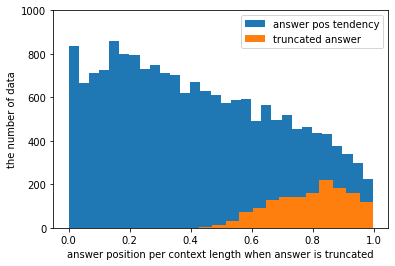

In [26]:
#@title matploblib hist
import numpy as np
plt.hist(ratedd,bins = 30, label='answer pos tendency')
plt.hist(train_dataset.y_trunc_result ,bins = 13 ,label = 'truncated answer')
plt.xlabel("answer position per context length when answer is truncated")
plt.ylabel('the number of data')
plt.ylim([0, 1000]) 
plt.legend()
plt.show()


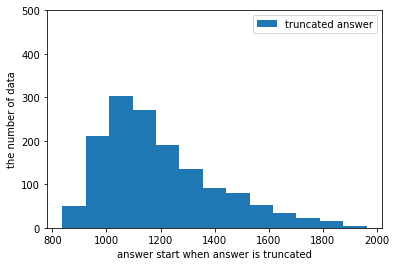


minimum : 837
maximum : 1962


In [33]:
plt.hist(train_dataset.y_trunc_anstart ,bins = 13 ,label = 'truncated answer')

plt.xlabel("answer start when answer is truncated")
plt.ylabel('the number of data')
plt.ylim([0, 500]) 
plt.legend()
plt.show()
print()
print(f"minimum : {min(train_dataset.y_trunc_anstart)}")
print(f"maximum : {max(train_dataset.y_trunc_anstart)}")

In [ ]:
add_end_idx(valid_answers, valid_contexts)                                                      #anwer 마다 answer_end 달아준다.
valid_dataset = KlueDataset(valid_contexts, valid_questions, valid_answers, 512, tokenizer)

In [ ]:
model = AutoModelForQuestionAnswering.from_pretrained(model_name)

In [ ]:
EPOCH = 3
LEARNING_RATE = 5e-5
BATCH_SIZE = 32

In [ ]:
def train_runner(model, train_dataset, valid_dataset , batch_size, num_train_epochs, learning_rate):
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    
    model.to(device)
    model.train()
    train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size)
    valid_dataloader = DataLoader(dataset = valid_dataset, batch_size = batch_size)

    lowest_total_valid_loss = 9999.

    global_total_step = len(train_dataloader) * num_train_epochs
    optimizer = AdamW(model.parameters(), lr=learning_rate, weight_decay=0)
    print("TRAIN START")
    with tqdm(total=global_total_step, unit='step') as t:
        total = 0
        total_loss = 0
        for epoch in range(num_train_epochs):
            for iteration,batch in enumerate(train_dataloader):
                optimizer.zero_grad()
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                start_positions = batch['start_positions'].to(device)
                end_positions = batch['end_positions'].to(device)
                outputs = model(input_ids,
                             attention_mask=attention_mask,
                             start_positions=start_positions,
                             end_positions=end_positions)
                loss = outputs.loss
                loss.backward()
                optimizer.step()
                
                batch_loss = loss.item() * len(input_ids)
                total += len(input_ids)
                total_loss += batch_loss
                global_total_step += 1
                t.set_postfix(loss="{:.6f}".format(total_loss / total), batch_loss="{:.6f}".format(batch_loss))
                t.update(1)
                
                del input_ids
                del attention_mask
                del start_positions
                del end_positions
                del outputs
                del loss

                ## validation ##
                if iteration != 0 and iteration % int(len(train_dataloader) / 10) == 0:
                    total_valid_loss = 0
                    for batch_val in valid_dataloader:
                        model.eval()
                        optimizer.zero_grad()

                        input_ids = batch_val['input_ids'].to(device)
                        attention_mask = batch_val['attention_mask'].to(device)
                        start_positions = batch_val['start_positions'].to(device)
                        end_positions = batch_val['end_positions'].to(device)
                
                        with torch.no_grad():
                            outputs = model(input_ids,
                                    attention_mask=attention_mask,
                                    start_positions=start_positions,
                                    end_positions=end_positions)
                            loss = outputs.loss
                            total_valid_loss += loss.item()
                    
                    if total_valid_loss < lowest_total_valid_loss:
                        print(f"lowest_total_valid_loss: {total_valid_loss} epoch : {epoch} iteration : {iteration}")
                        torch.save(model.state_dict(),'./output_model_best')
                        lowest_total_valid_loss = total_valid_loss
                ## validation ##

    #model.save_pretrained("./klue_output_model")
    print("TRAIN END")

In [ ]:
train_runner(model,train_dataset,valid_dataset, BATCH_SIZE, EPOCH, LEARNING_RATE)

In [ ]:
def read_dev_klue(path):
    with open(path, 'rb') as f:
        klue_dict = json.load(f)

    contexts = []
    questions = []
    answers = []
    guids = []

    for group in tqdm(klue_dict['data']):
        for passage in group['paragraphs']:
            context = passage['context']
            for qa in passage['qas']:
                question = qa['question']
                guid = qa['guid']
                #temp_answer = []
                #for answer in qa['answers']:
                    #temp_answer.append(answer['text'])
                #if len(temp_answer) != 0: # answers의 길이가 0 == 답변할 수 없는 질문
                    #contexts.append(context)
                    #questions.append(question)
                    #answers.append(temp_answer)
                contexts.append(context)##
                questions.append(question)##
                guids.append(guid)

    #return contexts, questions, answers
    return contexts, questions , guids

In [ ]:
#dev_contexts, dev_questions, dev_answers = read_dev_klue("/content/drive/MyDrive/WARNING_PRIVATE_FOLDER/goorm_nlp_8th_group3/goorm_nlp_8th_group3/project2/test.json")
dev_contexts, dev_questions, dev_guids = read_dev_klue("/content/drive/MyDrive/WARNING_PRIVATE_FOLDER/goorm_nlp_8th_group3/goorm_nlp_8th_group3/project2/test.json")

In [ ]:
import re
def remove_post(text):
        ''' 불필요한 기호 제거 '''
        text = text.strip()
        text = re.sub("''", "'", text)
        text = re.sub('""', '"', text)
        text = re.sub("‘‘", "‘", text)
        text = re.sub("’’", "’", text)
        text = re.sub("  ", " ", text)
        text = re.sub("#", "", text)
        return text

In [ ]:


def prediction(contexts, questions, guids):
    device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
    model.load_state_dict(torch.load('./output_model_best', map_location=device))
    #model.load_state_dict(torch.load('./output_model_best'))
    
    model.to(device)
    
    model.eval()
    
    result = []
    
    with torch.no_grad():
        
        for context, question, guid in zip(contexts, questions, guids):

            encodings = tokenizer(context, question, max_length=512, truncation=True,
                                     padding="max_length", return_token_type_ids=False)
            print(tokenizer.decode(encodings['input_ids'])[:20],"#########", context[:20])
            encodings = {key: torch.tensor([val]) for key, val in encodings.items()}
            
            input_ids = encodings["input_ids"].to(device)
            attention_mask = encodings["attention_mask"].to(device)
            
            outputs = model(input_ids, attention_mask=attention_mask)
            start_logits, end_logits = outputs.start_logits, outputs.end_logits
            
            token_start_index, token_end_index = start_logits.argmax(dim=-1), end_logits.argmax(dim=-1)
            pred_ids = input_ids[0][token_start_index: token_end_index + 1]
            if token_start_index > token_end_index:
                #print("이상값 : ",tokenizer.decode(pred_ids))
                pred = tokenizer.decode(pred_ids)
            else:
                pred = tokenizer.decode(pred_ids)
                #pred = pred[:10] 
                #pred = remove_post(pred)

            #if token_start_index > token_end_index or len(pred) > 20 or len(context) > 800:
            # if len(context) > 800:
            #     encodings = tokenizer(context[800:], question, max_length=512, truncation=True,
            #                          padding="max_length", return_token_type_ids=False)
            #     encodings = {key: torch.tensor([val]) for key, val in encodings.items()}
            
            #     input_ids = encodings["input_ids"].to(device)
            #     attention_mask = encodings["attention_mask"].to(device)
            
            #     outputs = model(input_ids, attention_mask=attention_mask)
            #     start_logits2, end_logits2 = outputs.start_logits, outputs.end_logits
            
            #     token_start_index, token_end_index = start_logits2.argmax(dim=-1), end_logits2.argmax(dim=-1)
            #     pred_ids = input_ids[0][token_start_index: token_end_index + 1]
            #     pred2 = tokenizer.decode(pred_ids)
            #     if len(pred) == 0 or max(start_logits[0]) + max(end_logits[0]) < max(start_logits2[0]) + max(end_logits2[0]):
            #         pred = pred2
                #print(question,max(start_logits[0]),max(end_logits[0]),pred,"#####",max(start_logits2[0]),max(end_logits2[0]),pred2)

            #print(question,max(start_logits[0]),max(end_logits[0]),pred,"#####",max(start_logits2[0]),max(end_logits2[0]),pred2)
            if len(pred) > 10:
                pred = pred[:5]
            elif len(pred) > 9:
                pred = pred[:6]
            elif len(pred) > 8:
                pred = pred[:7]
            pred = remove_post(pred)
            tp = (guid,pred)
            result.append(tp)
    return result

In [ ]:
pred_answers = prediction(dev_contexts, dev_questions, dev_guids)
pred_answers

In [ ]:
import csv
f = open('monologg_koelectra-small-v2-distilled-korquad-384_32batch_10trucation_pre_postprocessing_contextslicing_steppostprocessing.csv','w', newline='')
wr = csv.writer(f)
wr.writerow(['Id','Predicted'])

for tp in pred_answers:
    wr.writerow([tp[0],tp[1]])

f.close()